Q1. 일별 자전거 이용건수
Q2. 대여시간대별, 요일별 자전거 이용건수
Q3. 주말, 평일 이용건수
Q4. 인기명소

In [4]:
import pandas as pd

bikes_tmp={}

for i in range(1, 4):
    bikes_tmp[i] = pd.read_csv(f'day8_data\서울특별시 공공자전거 대여이력 정보_240{i}.csv', encoding='cp949')

In [9]:
bikes = pd.concat(bikes_tmp, ignore_index=True)

In [10]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,0.00,2002,M,내국인,ST-2630,ST-850,일반자전거
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,1147.58,1993,NaN,내국인,ST-2654,ST-299,일반자전거
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,642.13,2004,F,내국인,ST-253,ST-1194,일반자전거
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,830.00,\N,M,내국인,ST-533,ST-309,일반자전거
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,791.08,1995,M,내국인,ST-1813,ST-162,일반자전거


In [11]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 960.4+ MB


- 날짜 데이터로 변경 : pd.to_datetime(변수명)
- dt 액세서 : 변수명.dt.year, 변수명.dt.month, 변수명.dt.day, 변수명.dt.weekday(0~6 : 월 ~ 일), 변수명.dt.hour

In [13]:
# 일자별, 요일별, 주말구분별, 대여시간대별 따릉이 이용건수 파악
# 대여일, 일자, 요일, 대여시간대, 주말구분 칼럼 추가

bikes['대여일'] = pd.to_datetime(bikes['대여일시'])
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 18 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      object        
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  대여일       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(13)
memory usage: 1016.9+ MB


In [16]:
# 월, 일자, 시간대 칼럼 추가

bikes['월'] = pd.to_datetime(bikes['대여일']).dt.month
bikes['일자'] = pd.to_datetime(bikes['대여일']).dt.day
bikes['시간대'] = pd.to_datetime(bikes['대여일']).dt.hour

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 22 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      object        
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  대여일       datetime64[ns]
 18  월         int32         
 19  일자        int32         
 20  시간대       int32         
 21  요일구분      int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(3), object(13)
memory usage: 1.1+ GB


In [25]:
bikes['요일_n'] = pd.to_datetime(bikes['대여일']).dt.weekday
bikes['요일_n'].value_counts().sort_index()

요일_n
0     977123
1    1088280
2    1173864
3    1147832
4    1146668
5     987407
6     883904
Name: count, dtype: int64

In [26]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,대여일,월,일자,시간대,요일_n
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,...,M,내국인,ST-2630,ST-850,일반자전거,2024-01-01 00:04:10,1,1,0,0
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,...,NaN,내국인,ST-2654,ST-299,일반자전거,2024-01-01 00:00:10,1,1,0,0
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,...,F,내국인,ST-253,ST-1194,일반자전거,2024-01-01 00:03:13,1,1,0,0
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,...,M,내국인,ST-533,ST-309,일반자전거,2024-01-01 00:02:42,1,1,0,0
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,...,M,내국인,ST-1813,ST-162,일반자전거,2024-01-01 00:03:02,1,1,0,0


In [31]:
weekdays={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
bikes['요일'] = bikes['요일_n'].map(weekdays)

weekends={'월':'평일', '화':'평일', '수':'평일', '목':'평일', '금':'평일', '토':'주말', '일':'주말'}
bikes['주말구분'] = bikes['요일'].map(weekends)

bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자전거구분,대여일,월,일자,시간대,요일_n,요일,주말구분
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,...,ST-2630,ST-850,일반자전거,2024-01-01 00:04:10,1,1,0,0,월,평일
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,...,ST-2654,ST-299,일반자전거,2024-01-01 00:00:10,1,1,0,0,월,평일
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,...,ST-253,ST-1194,일반자전거,2024-01-01 00:03:13,1,1,0,0,월,평일
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,...,ST-533,ST-309,일반자전거,2024-01-01 00:02:42,1,1,0,0,월,평일
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,...,ST-1813,ST-162,일반자전거,2024-01-01 00:03:02,1,1,0,0,월,평일


In [35]:
# 1월 일자별 대여현황
daily_ride_01 = bikes.query('월==1').groupby('일자', as_index=False)['자전거번호'].count()

Text(0.5, 1.0, '1월 일자별 따릉이 이용현황')

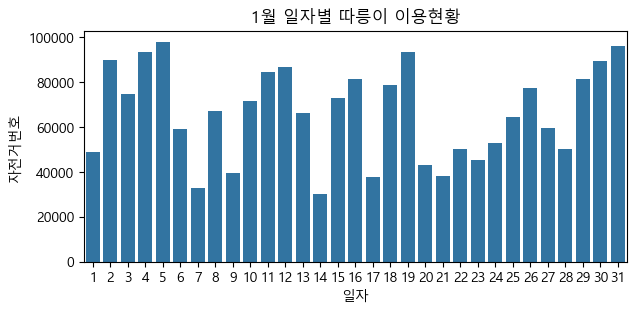

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')

plt.figure(figsize=(7, 3))
sns.barplot(data=daily_ride_01, x='일자', y='자전거번호')
plt.title('1월 일자별 따릉이 이용현황')

Text(0.5, 1.0, '3월 일자별 따릉이 이용현황')

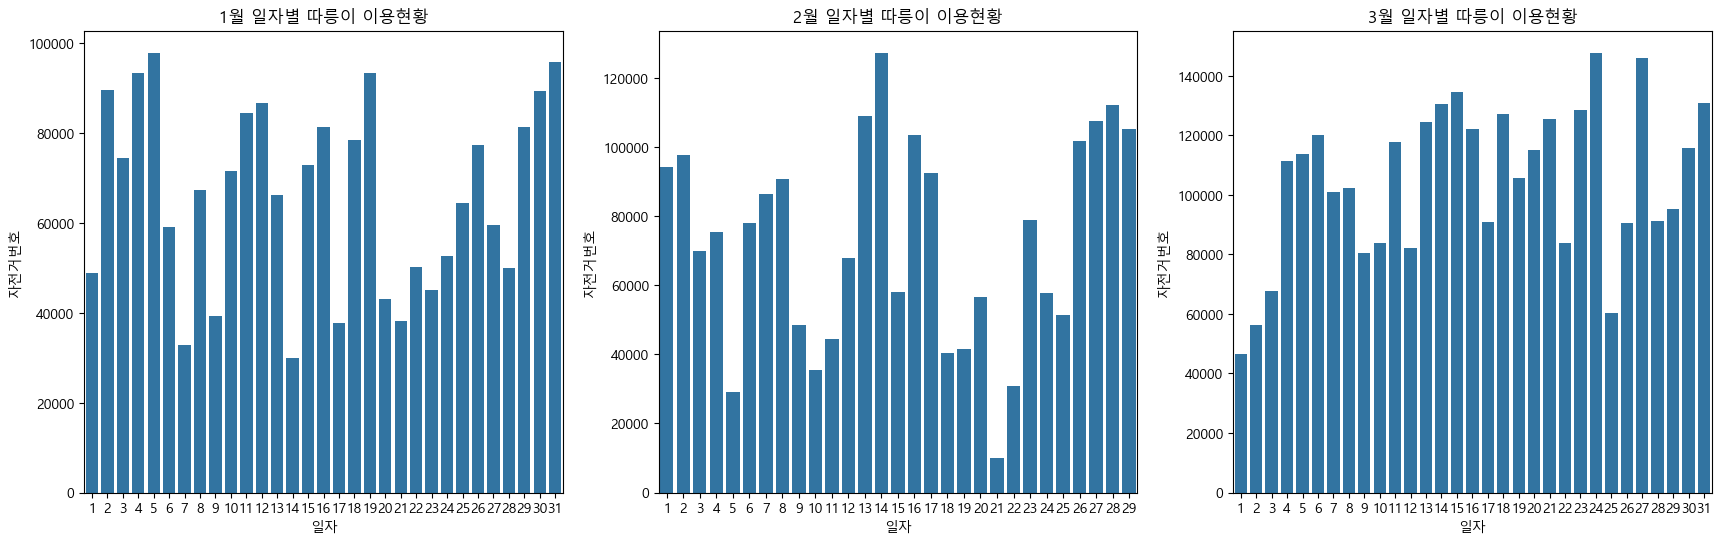

In [53]:
# 2월, 3월 일자별 대여현황
daily_ride_02 = bikes.query('월==2').groupby('일자', as_index=False)['자전거번호'].count()
daily_ride_03 = bikes.query('월==3').groupby('일자', as_index=False)['자전거번호'].count()

fig, axes = plt.subplots(1, 3, figsize=(21, 6))

sns.barplot(data=daily_ride_01, x='일자', y='자전거번호', ax=axes[0])
axes[0].set_title('1월 일자별 따릉이 이용현황')
sns.barplot(data=daily_ride_02, x='일자', y='자전거번호', ax=axes[1])
axes[1].set_title('2월 일자별 따릉이 이용현황')
sns.barplot(data=daily_ride_03, x='일자', y='자전거번호', ax=axes[2])
axes[2].set_title('3월 일자별 따릉이 이용현황')


Text(0.5, 1.0, '대여시간대별 따릉이 이용현황')

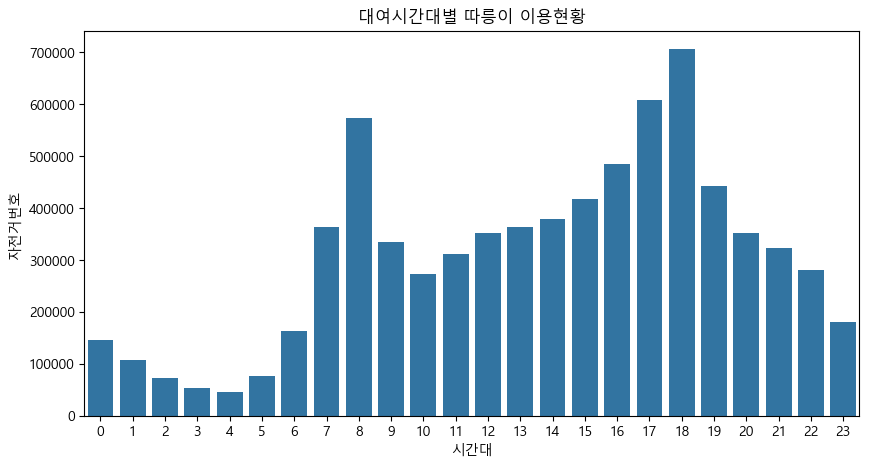

In [55]:
# 대여시간대별 따릉이 이용건수 그래프 작성
hourly_ride = bikes.groupby('시간대', as_index=False)['자전거번호'].count()
plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_ride, x='시간대', y='자전거번호')
plt.title('대여시간대별 따릉이 이용현황')

Text(0.5, 1.0, '요일별 따릉이 이용현황')

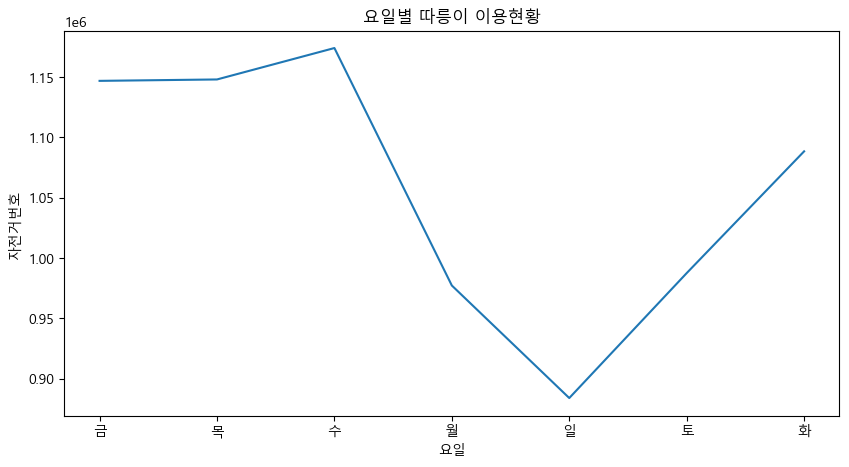

In [61]:
# 요일별 따릉이 이용건수 그래프 작성
weekday_ride = bikes.groupby('요일', as_index=False)['자전거번호'].count()
plt.figure(figsize=(10, 5))
sns.lineplot(data=weekday_ride, x='요일', y='자전거번호')
plt.title('요일별 따릉이 이용현황')


([<matplotlib.patches.Wedge at 0x1c7ced7b750>,
 [Text(0.771175933417397, 0.7844027535123819, '주말'),
  Text(-0.7711757245805579, -0.784402958827701, '평일')],
 [Text(0.42064141822767104, 0.42785604737039007, '25.3%'),
  Text(-0.4206413043166679, -0.4278561593605641, '74.7%')])

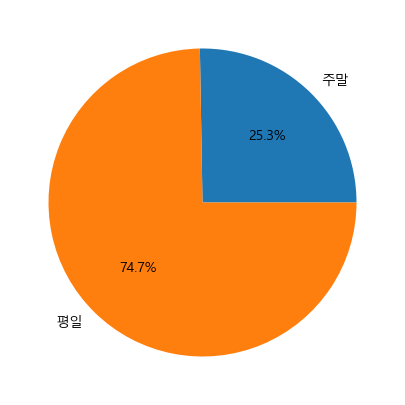

In [62]:
# 주말구분별 따릉이 이용건수 그래프 작성 : 파이(원) 그래프
weekend_ride = bikes.groupby('주말구분', as_index=False)['자전거번호'].count()
plt.figure(figsize=(10, 5))
plt.pie(weekend_ride['자전거번호'], labels=weekend_ride['주말구분'], autopct='%.1f%%')

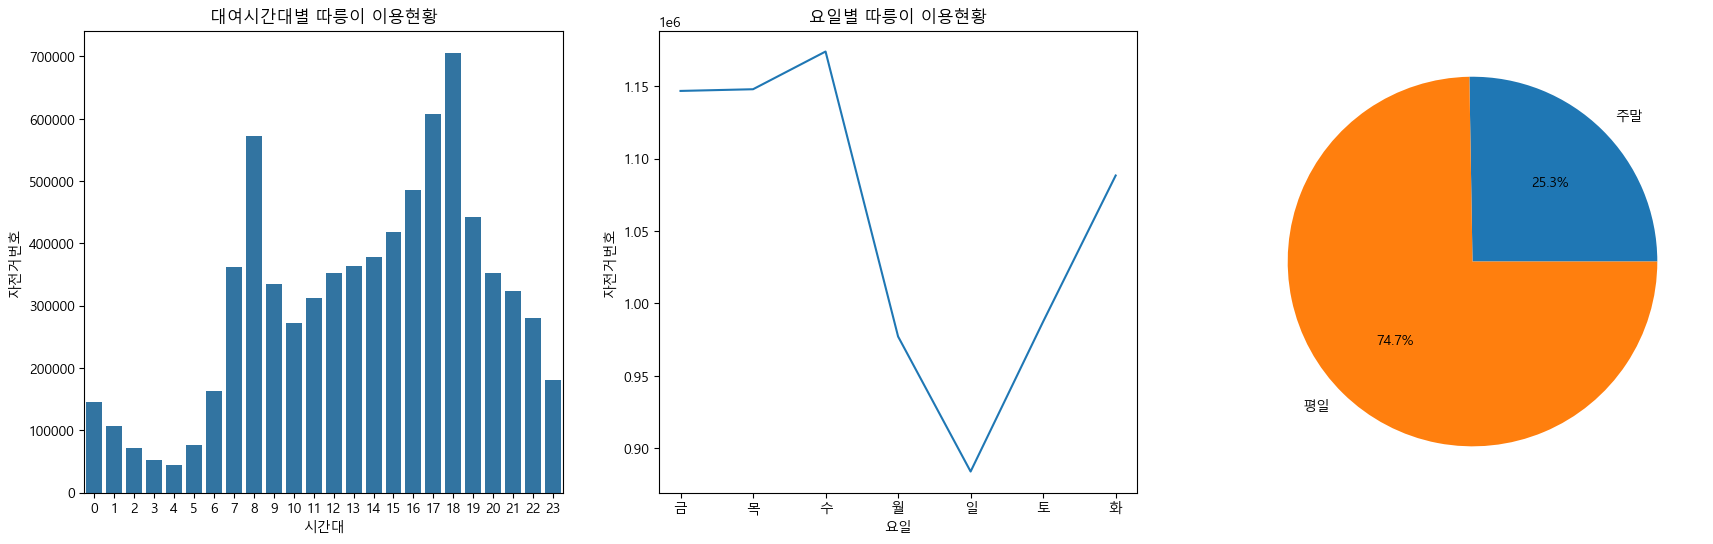

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

sns.barplot(data=hourly_ride, x='시간대', y='자전거번호', ax=axes[0])
axes[0].set_title('대여시간대별 따릉이 이용현황')
sns.lineplot(data=weekday_ride, x='요일', y='자전거번호', ax=axes[1])
axes[1].set_title('요일별 따릉이 이용현황')
axes[2] = plt.pie(weekend_ride['자전거번호'], labels=weekend_ride['주말구분'], autopct='%.1f%%')

In [68]:
# 대여시간대별 & 요일별 이용건수
hourly_weekday_ride = weekend_ride = bikes.groupby(['시간대', '요일'], as_index=False)['자전거번호'].count()
hourly_weekday_ride.head()


,시간대,요일,자전거번호
0,0,금,23351
1,0,목,20715
2,0,수,20657
3,0,월,15891
4,0,일,23361


<Axes: xlabel='시간대', ylabel='자전거번호'>

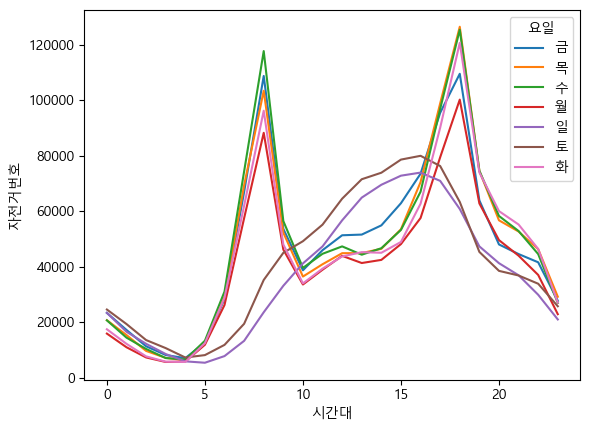

In [70]:
sns.lineplot(data=hourly_weekday_ride, x='시간대', y='자전거번호', hue='요일')

In [85]:
hourly_weekday_ride2 = bikes.pivot_table(index='시간대', columns='요일', values='자전거번호', aggfunc='count')

# 열 순서를 지정하여 재정렬
hourly_weekday_ride2 = hourly_weekday_ride2.reindex(columns=['월', '화', '수', '목', '금', '토', '일'])

<Axes: xlabel='요일', ylabel='시간대'>

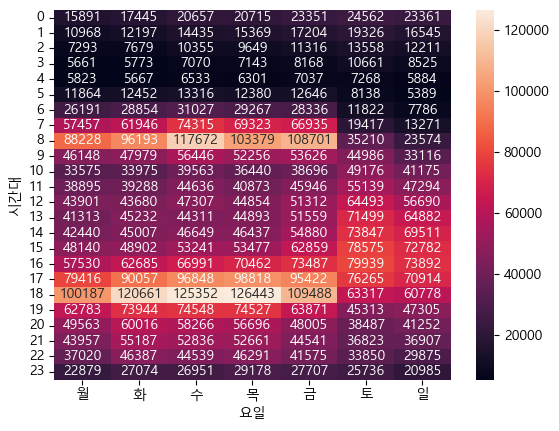

In [87]:
plt.Figure(figsize=(12, 10))
sns.heatmap(hourly_weekday_ride2, annot=True, fmt='d')

In [89]:
hourly_weekday_ride3 = weekend_ride = bikes.groupby(['시간대', '요일'])['자전거번호'].count().unstack()
hourly_weekday_ride3

요일,금,목,수,월,일,토,화
시간대,,,,,,,
0,23351,20715,20657,15891,23361,24562,17445
1,17204,15369,14435,10968,16545,19326,12197
2,11316,9649,10355,7293,12211,13558,7679
3,8168,7143,7070,5661,8525,10661,5773
4,7037,6301,6533,5823,5884,7268,5667
5,12646,12380,13316,11864,5389,8138,12452
6,28336,29267,31027,26191,7786,11822,28854
7,66935,69323,74315,57457,13271,19417,61946
8,108701,103379,117672,88228,23574,35210,96193


In [100]:
# 인기있는 대여소 Top 50 : 주말, 평일 구분

# 주말 인기 대여소
bikes_weekend = bikes.groupby(['대여 대여소번호', '대여 대여소명', '주말구분'])['자전거번호'].count().unstack()
bikes_weekend

,주말구분,주말,평일
대여 대여소번호,대여 대여소명,,
102,망원역 1번출구 앞,1794.0,4485.0
103,망원역 2번출구 앞,1609.0,3149.0
104,합정역 1번출구 앞,976.0,2826.0
105,합정역 5번출구 앞,740.0,1662.0
106,합정역 7번출구 앞,1975.0,2915.0
...,...,...,...
6055,한국경제,145.0,748.0
6171,월드빌딩 앞,626.0,1760.0
6172,가양5단지아파트,156.0,514.0


In [105]:
weekend50 = bikes_weekend.sort_values('주말', ascending=False).head(50).reset_index()
weekend50.head()

주말구분,대여 대여소번호,대여 대여소명,주말,평일
0,4217,한강공원 망원나들목,9011.0,8691.0
1,502,자양(뚝섬한강공원)역 1번출구 앞,7992.0,11407.0
2,2715,마곡나루역 2번 출구,6274.0,26543.0
3,1210,롯데월드타워(잠실역2번출구 쪽),5606.0,13241.0
4,207,여의나루역 1번출구 앞,5410.0,8141.0


In [111]:
bike_station = pd.read_excel('day8_data\공공자전거 대여소 정보(24.12월 기준).xlsx', header=5)
bike_station.head()

,대여소번호(입력),대여소명,자치구,주소,거치대수,방식,운영여부,설치시기
0,1397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,대여소번호(입력),대여소명,자치구,주소,거치대수,방식,운영여부,설치시기
3,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
